In [1]:
import yfinance as yf
import pandas as pd

# Define the company's ticker symbol
company_ticker = 'NOV'

# Retrieve the company's financial data
company = yf.Ticker(company_ticker)
financials = company.financials.T  # Transpose for easier readability

# Calculate Gross Profit and Gross Profit Growth
gross_profit = financials['Gross Profit']
gross_profit_growth = gross_profit.pct_change().dropna()

# Save to CSV files
gross_profit.to_csv(f'{company_ticker}_gross_profit.csv')
gross_profit_growth.to_csv(f'{company_ticker}_gross_profit_growth.csv')

gross_profit = gross_profit.dropna()  # or use .fillna() to fill with a specific value
gross_profit_growth = gross_profit.pct_change().dropna()

print(gross_profit_growth.isna().sum())
print(gross_profit_growth)


0
2022-12-31   -0.272231
2021-12-31   -0.419790
2020-12-31   -0.439276
Name: Gross Profit, dtype: float64


In [2]:
# Example peer companies
peers = ['LBRT']

# Collect data for peers
peer_gross_profits = {}
peer_gross_profit_growths = {}

for peer in peers:
    peer_company = yf.Ticker(peer)
    peer_financials = peer_company.financials.T
    
    peer_gross_profit = peer_financials['Gross Profit']
    peer_gross_profit_growth = peer_gross_profit.pct_change().dropna()
    
    peer_gross_profits[peer] = peer_gross_profit
    peer_gross_profit_growths[peer] = peer_gross_profit_growth
    
    # Save to CSV files
    peer_gross_profit.to_csv(f'{peer}_gross_profit.csv')
    peer_gross_profit_growth.to_csv(f'{peer}_gross_profit_growth.csv')


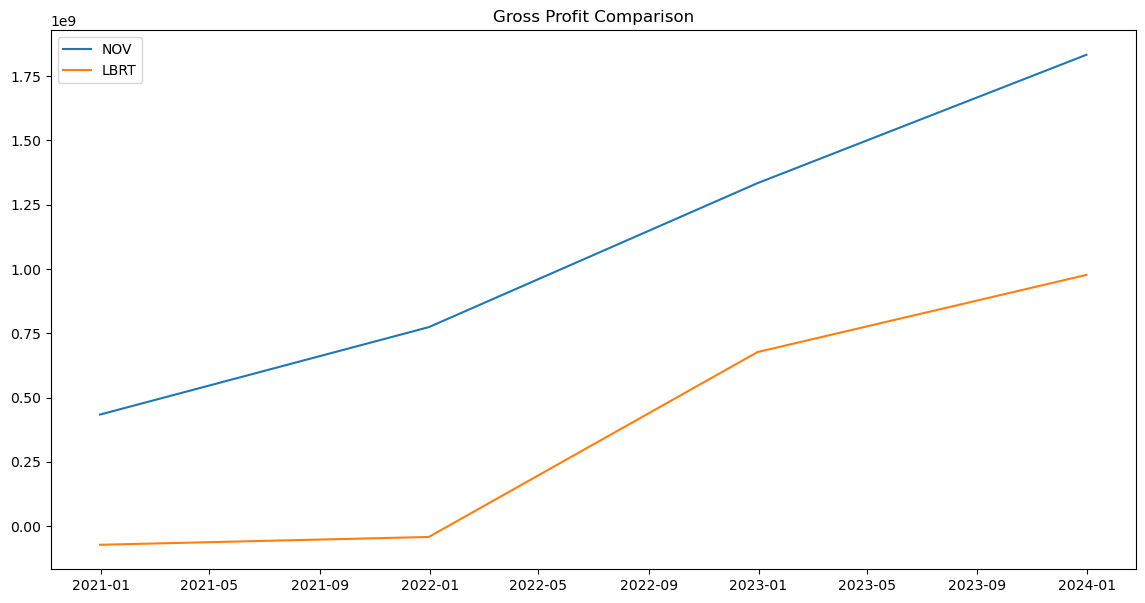

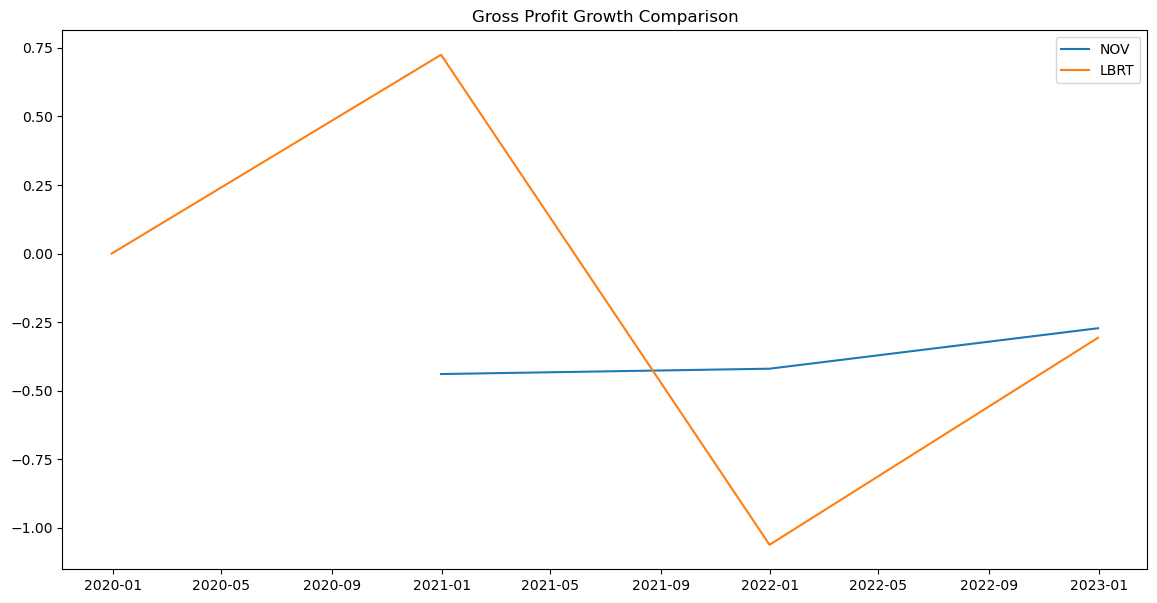

In [3]:
import matplotlib.pyplot as plt

# Plot Gross Profit
plt.figure(figsize=(14, 7))
plt.plot(gross_profit, label=company_ticker)

for peer in peers:
    plt.plot(peer_gross_profits[peer], label=peer)

plt.legend()
plt.title('Gross Profit Comparison')
plt.show()

# Plot Gross Profit Growth
plt.figure(figsize=(14, 7))
plt.plot(gross_profit_growth, label=company_ticker)

for peer in peers:
    plt.plot(peer_gross_profit_growths[peer], label=peer)

plt.legend()
plt.title('Gross Profit Growth Comparison')
plt.show()

In [4]:
# Retrieve current valuation
company_info = company.info
current_valuation = company_info['marketCap']
pe_ratios = {peer: yf.Ticker(peer).info['trailingPE'] for peer in peers}

print(f"Current Valuation of {company_ticker}: {current_valuation}")
print(f"P/E Ratios: {pe_ratios}")

Current Valuation of NOV: 7503317504
P/E Ratios: {'LBRT': 8.581674}


In [5]:
import numpy as np

# Assumptions for the model
years = 4

# Ensure gross profit growth has no NaN values
if gross_profit_growth.isna().sum() == 0:
    growth_rate = gross_profit_growth.mean()  # Average growth rate

    # Project future gross profit
    future_gross_profit = gross_profit.iloc[-1] * ((1 + growth_rate) ** years)

    # Simplified valuation model (e.g., assuming a constant P/E ratio)
    future_valuation = future_gross_profit * company_info['trailingPE']

    print(f"Projected Gross Profit in {years} years: {future_gross_profit}")
    print(f"Projected Valuation in {years} years: {future_valuation}")

Projected Gross Profit in 4 years: 65337874.15353635
Projected Valuation in 4 years: 499782029.21147346


In [6]:
# Adjusted growth rate
adjusted_growth_rate = growth_rate + 0.02

# Project future gross profit with the adjusted growth rate
adjusted_future_gross_profit = gross_profit[-1] * ((1 + adjusted_growth_rate) ** years)

# Adjusted valuation model
adjusted_future_valuation = adjusted_future_gross_profit * company_info['trailingPE']

print(f"Adjusted Projected Gross Profit in {years} years: {adjusted_future_gross_profit}")
print(f"Adjusted Projected Valuation in {years} years: {adjusted_future_valuation}")

Adjusted Projected Gross Profit in 4 years: 74142174.47314145
Adjusted Projected Valuation in 4 years: 567127824.2273846


In [7]:
impact = adjusted_future_valuation - future_valuation
print(f"Impact of Technological Advancement on Valuation: {impact}")

Impact of Technological Advancement on Valuation: 67345795.0159111
